<a href="https://www.kaggle.com/code/ayushs9020/knn-from-scratch?scriptVersionId=128490432" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv
/kaggle/input/sample-data/Sample_Data_1.csv
/kaggle/input/sample-data/Sample_Data_2.csv
/kaggle/input/sample-data/Sample_Data_3.csv


In [2]:
import numpy as np 
import pandas as pd 

In [3]:
from collections import Counter

In [4]:
import seaborn as sns 

# K Nearest Neighbors Classifier
So what is this big term means???

Lets try to break it. 

**Classifier** - An algorithm that classifies something into something 

**Neighbors** - People who lives by our side. Sometimes they are our best firends and sometimes the worst nightmares

**Nearest** - Something that is closes to us 

**K** - Frankly speaking this is just an arbitary number. 

So what is this line says...

**An algorithm that classifies on the baisis of nearest neighbors**

Lets try to get more picture of this 

Lets assume we have $2$ different societies. `Mathematicians` and `Engineeers`, and they are eneimies of each other. So they live at a good distance from each other. Also they frequenctly attack each other with `pens` and `compasses`. So they like in dense clusters, to protect each other. 

Lets assume you are very rich artist. and you went on a tour with you `helicopter`. and saw something like this 

In [5]:
data_1 = pd.read_csv("/kaggle/input/sample-data/Sample_Data_1.csv")

In [6]:
data_1

,x,y,z
0,-33.963989,231.962014,a
1,34.152445,206.708388,a
2,7.545619,191.622019,a
3,6.862322,256.882087,a
4,-5.574613,209.725402,a
...,...,...,...
1158,630.098767,352.367983,b
1159,654.050088,412.010639,b
1160,709.733033,391.610226,b
1161,623.373461,405.861758,b


In [7]:
data_1["z"] = np.where(data_1["z"] == "a" , "Mathematicians" , "Engineers")

<AxesSubplot:xlabel='x', ylabel='y'>

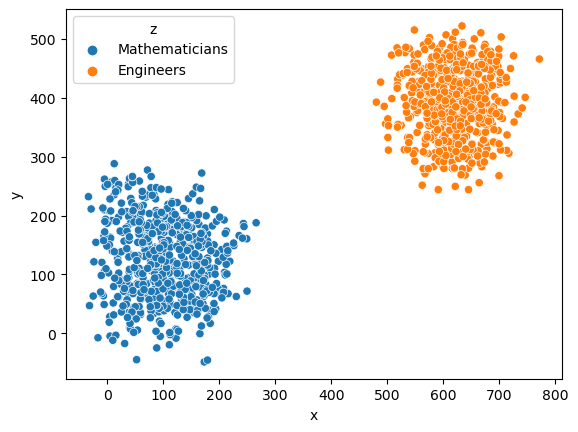

In [8]:
sns.scatterplot(x = data_1["x"] , y = data_1["y"] , hue = data_1["z"])

You see that `Mathematicians` haven choosen a colour which is `blue` , and colored their houses as `blue` , and same is the case with the `Engineers` , where the color is `Orange`. Lets assume there lives $2$ people with unknown type , somewhere here 

In [9]:
data_2 = pd.read_csv("/kaggle/input/sample-data/Sample_Data_2.csv")

In [10]:
for i in range(len(data_2["z"])):
    if data_2["z"][i] == "a":
        data_2["z"][i] = "Mathematicians"
    elif data_2["z"][i] == "b":
        data_2["z"][i] = "Engineers"
    else :
        data_2["z"][i] = "Unknown Homies"

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<AxesSubplot:xlabel='x', ylabel='y'>

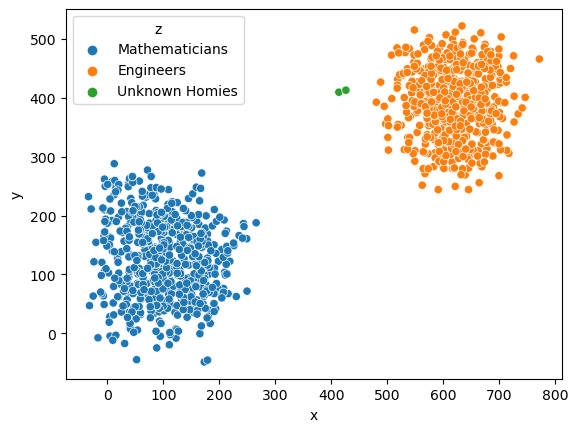

In [11]:
sns.scatterplot(x = data_2["x"] , y = data_2["y"] , hue = data_2["z"])

By unknown people, I mean the `Green` ones. If I ask you what are the chances that these `green` ones will be a `Mathemtician` or `Engineer`. You will say it is hard to determine, but as they live near the `Engineeers`, there is a comparitvely high chance of them being into the `Engineer`. Lets assume you notice two more unknown houses there 

In [12]:
data_3 = pd.read_csv("/kaggle/input/sample-data/Sample_Data_3.csv")

In [13]:
for i in range(len(data_2["z"])):
    if data_3["z"][i] == "a":
        data_3["z"][i] = "Mathematicians"
    elif data_3["z"][i] == "b":
        data_3["z"][i] = "Engineers"
    elif data_3["z"][i] == "c":
        data_3["z"][i] = "Unknown Homies"
    else : 
        data_3["z"][i] = "Just Some Guys"

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<AxesSubplot:xlabel='x', ylabel='y'>

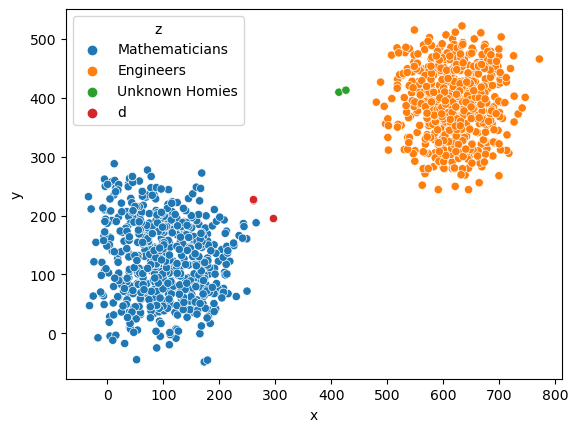

In [14]:
sns.scatterplot(x = data_3["x"] , y = data_3["y"] , hue = data_3["z"])

Here they are the `Red` ones. If I ask you the same the question for the `Red` ones, You would say its still difficult to predict but as they live near the `Mathematicians`, there is a comparitvely high chance of them being into the `Mathematician`. 

At the end we can say that, If we dont know wehter a person is `Mathamtician` or an `Engineer`, we can kind of find that by seeing which community is the closest to that person. or...

**We can find the label of a unknown data point by seeing which label is the closes to the unknown data type.**

It is really easy for us to determine distances, but we are also lazy (atleast I am), and thus want machines to do our work. 

So how do we define distance for a machine to work on...?

One way is to find `Euclidian Distance` between $2$ points. 

Lets assume we have the same data

<AxesSubplot:xlabel='x', ylabel='y'>

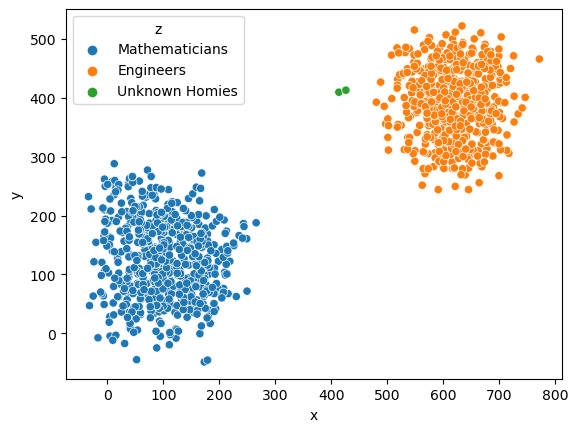

In [15]:
sns.scatterplot(x = data_2["x"] , y = data_2["y"] , hue = data_2["z"])

What we can do is to find the `Eucldian Distance` with all the points, then sort them and then find the `smallest ones`, the labels of the smalles ones will be the label of the unknown one. For conviniance we do not just compute the label with the smallest point, we compute the labels of the `k` smallest points, where `k` can be any integer. 

One another way to define this `Algorithm` is to say 

**An algorithm that classifies on the baisis of nearest neighbors**

We give this alogrithm a fancy name `K Nearest Neighbors`

The logic behind `K nearest Neighbors` is to find the `euclidian distance` between `k` nearest points of the point we need to dinf and the point we need to find. As we are dealing with $2$ point coordinate system only(as of now), we will be using the formula

$$Euclidian_-Distance = \sqrt {(x_1 - x_2)^2 + (y_1 - y_2)^2}$$


For an instance lets assume the coordinates of this point is $(400 , 400)$

In [16]:
x1 = 400
y1 = 400

Apllying the Distance formula for all of the coordinates 

In [17]:
distance = [np.sqrt(np.square(x1 - x2) + np.square(y1 - y2)) 
            for x2 , y2 in zip(data_1["x"] , data_1["y"])]
     

In [18]:
distance 

[465.36169609606145,
 413.77056537859454,
 444.3442631835739,
 418.3777849006065,
 447.99016681249935,
 414.48121515948685,
 390.9103832794349,
 370.9802596693535,
 411.63260149411803,
 385.89549883678404,
 393.10242349169613,
 415.61438775765157,
 350.7411699982081,
 428.32232721655953,
 396.9978477366586,
 371.83415916764324,
 348.6231323267701,
 357.1876204431158,
 381.976858089768,
 354.69108115954384,
 321.03870262918673,
 354.37501766370565,
 307.3339925755601,
 386.21667283657655,
 343.3102690497267,
 366.87396494674465,
 374.08535030217547,
 397.20666385142715,
 398.00592226738996,
 407.3854309453152,
 488.10715145879846,
 400.2821208297602,
 424.2218542971526,
 401.5592448450982,
 464.1438368221187,
 438.1757723205009,
 421.1147824544457,
 430.54891527962917,
 439.3036451338084,
 398.2275276499946,
 404.74027777144227,
 416.49808558258417,
 343.8232150539085,
 398.1597319584695,
 365.59985454213154,
 347.007814435947,
 335.9119292468422,
 337.8462916626942,
 333.8914788819134,

So these are all our distances, now we need to sort them and find their labels 

In [19]:
data_1["z"][np.argmin(distance)]

'Engineers'

So our algorithm says this should be an `Engineer`

If we take more neighbors like $3$, we can get that by 

In [20]:
data_1["z"][np.argsort(distance)[:3]]

893    Engineers
870    Engineers
894    Engineers
Name: z, dtype: object

But how do we count them, or see which label occurs the most, for that we use 

In [21]:
Counter(data_1["z"][np.argsort(distance)[:3]]).most_common()

[('Engineers', 3)]

or

In [22]:
Counter(data_1["z"][np.argsort(distance)[:3]]).most_common()[0][0]

'Engineers'

Now lets try to put all of this into a Function 

In [23]:
from collections import Counter
import numpy as np 

def KNN(X_train , y_train , X_test):
    distance = [0] * X_train.shape[0]
    for columns in X_train.columns:
        for index in range(len(X_train[columns])):
            distance[index] += X_train[columns][index] - X_test[columns][index]
    distance = np.sqrt(np.array(distance))
    return Counter(y_test[np.argsort(distance)[:3]]).most_common()[0][0]

**THIS IS NOT THE FULL IMPLEMENTATION, IT STILL LACKS MANY FUNCTIONALITIES AND IS VULENRABLE TO MANY EDGE CASES, WE WILL IMPROVE THIS IN THE UPCOMING VERSIONS**

**PLEASE COMMENT DOWN IF I DID ANY MISTAKES, OR IF CAN MAKE THIS MORE CONNECTED TO THE GROUND, OR SUGGESTIONS. YOUR ASSISTS ARE HIGHLY APPRECIABLE**

**THATS IT FOR TODAY GUYS**

**HOPE YOU UNDERSTOOD AND LIKED MY WORK**

**DONT FORGET TO MAKE AN UPVOTE :)**

**PEACE OUT !!!**